## 2. (a) 分析全球温度与位置的关系 

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


df = pd.read_csv('./data/year2.csv')
df.drop(columns=['AverageTemperatureUncertainty', 'location'], inplace=True)

## 以Latitude与Longitude为X, AverageTemperature为y训练决策树回归模型

- 决策树的R方系数为0.994, 能较好的划分样本空间
- 在决策树的特征重要程度中, Latitude较为重要, 占据了85%的重要性, 其次是Longitude

In [6]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
X = df.drop(columns=['AverageTemperature', 'year'])
y = df['AverageTemperature']
print(X.shape, y.shape)
model.fit(X, y)
print(model.score(X, y))
for i, j in zip(X.columns, model.feature_importances_):
    print(f'{i}: {j}')
print('Latitude range: ')
print(X['Latitude'].min(), X['Latitude'].max())
print('Longitude range')
print(X['Longitude'].min(), X['Longitude'].max())

(11300, 2) (11300,)
0.9941533680736752
Latitude: 0.8526638692711989
Longitude: 0.14733613072880117
Latitude range: 
-37.78 60.27
Longitude range
-118.7 151.78


- 将经纬度划分格点, -150 < Longitude < 150, -60 < Latitude < 60
- 使用训练好的决策树模型预测这些数据点的温度, 并以此画出地球上各个点的温度
- 这里需要在图上手动标记亚洲、欧洲、非洲、以及太平洋等
- 结论是对于温度和位置的关系有 1. 纬度越低温度越低 2. 陆地温度高于海洋温度(解释可以是陆地上国家多排放量大或者陆地海洋比热容啥的)

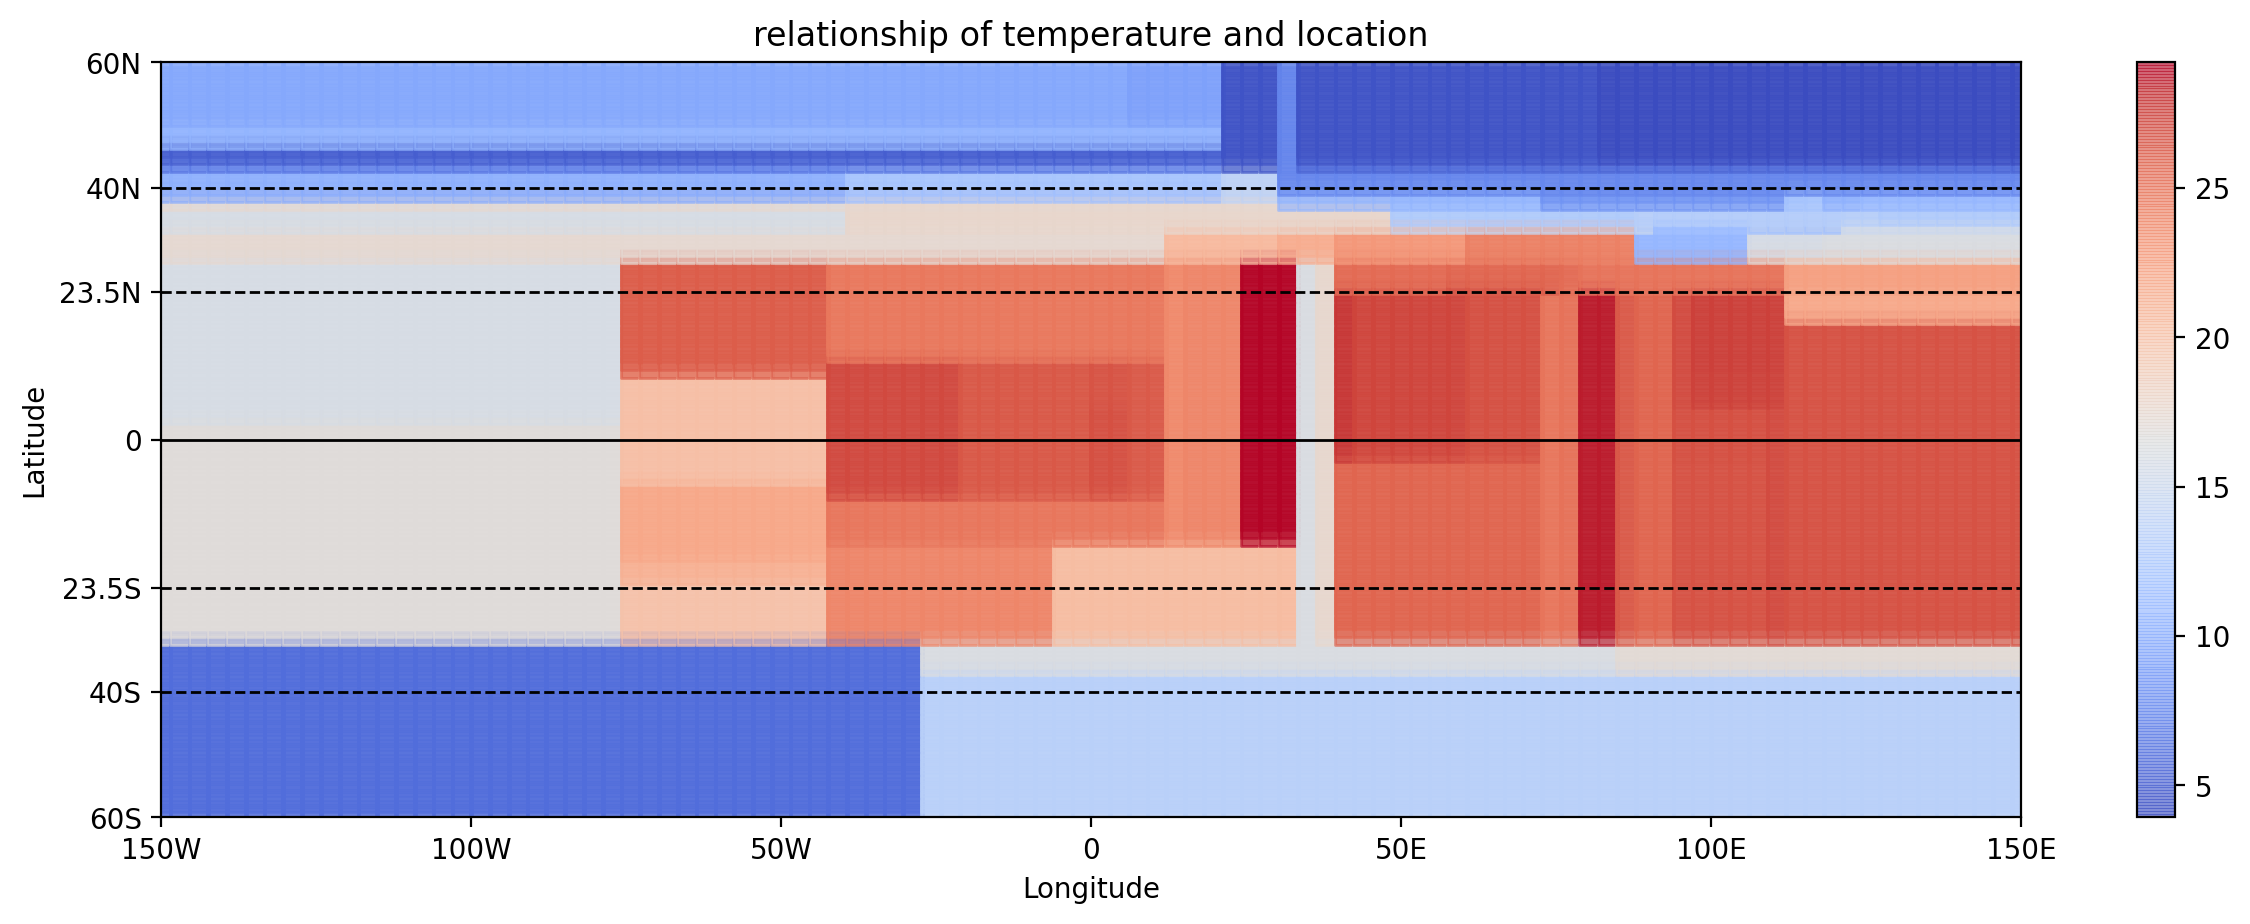

In [7]:
x = np.linspace(-60, 60, 100)
y = np.linspace(-150, 150, 100)
xx, yy = np.meshgrid(x, y)
data = pd.DataFrame(np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1), columns=['Latitude', 'Longitude'])
data['label'] = model.predict(data)
plt.figure(figsize=(15, 5), dpi=200)
plt.xlim([-150, 150])
plt.ylim([-60, 60])
plt.scatter(data['Longitude'], data['Latitude'], c=data['label'], s=54.5, marker='s', cmap='coolwarm', alpha=0.65)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.yticks([0, -60, 60, -23.5, 23.5, -40, 40], [0, '60S', '60N', '23.5S', '23.5N', '40S', '40N'])
plt.xticks([-150, -100, -50, 0, 50, 100, 150], ['150W', '100W', '50W', '0', '50E', '100E', '150E'])
plt.plot(np.linspace(-180, 180, 1000), np.zeros(1000), color='black', linewidth=1)
plt.plot(np.linspace(-180, 180, 1000), np.ones(1000) * 23.5, '--', color='black', linewidth=1)
plt.plot(np.linspace(-180, 180, 1000), np.ones(1000) * 40, '--', color='black', linewidth=1)
plt.plot(np.linspace(-180, 180, 1000), np.ones(1000) * -40, '--', color='black', linewidth=1)
plt.plot(np.linspace(-180, 180, 1000), np.ones(1000) * -23.5, '--', color='black', linewidth=1)
plt.colorbar()
plt.title('relationship of temperature and location')
# plt.savefig('../visualize/relationship_of_temperature_and_location.png')
plt.show()